In [70]:
import pandas as pd
# dataprep

from IPython.display import clear_output


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize']=[17,10]
import seaborn as sns

In [71]:
df= pd.read_csv('RMSF.csv')

In [72]:
df

,County,Year,LST,Precipitation,NDVI,RH,avg_temp,max_temp,min_temp,Cases
0,Pima,2006,36.623543,0.791023,0.199175,61.663095,20.829992,33.340,10.127,0
1,Santa Cruz,2006,31.509315,1.223425,0.302374,69.567057,17.075364,29.943,6.448,0
2,Gila,2006,28.313258,1.235358,0.355017,61.666447,15.491440,27.803,2.646,2
3,Yuma,2006,39.891330,0.175424,0.144477,57.504886,23.649551,35.569,12.451,0
4,Cochise,2006,32.670637,0.960475,0.247526,68.140400,17.014240,29.133,5.549,0
...,...,...,...,...,...,...,...,...,...,...
220,Graham,2020,32.414231,0.796000,0.290644,67.227296,17.754924,28.186,2.182,1
221,Pinal,2020,36.477662,0.685729,0.247965,59.952446,22.094274,32.706,7.448,0
222,Maricopa,2020,37.775552,0.568762,0.216310,57.777460,23.158180,32.599,7.955,2
223,Navajo,2020,30.993715,0.570103,0.226935,72.176496,13.579075,24.617,-3.060,26


In [73]:
df.describe(include='all')

,County,Year,LST,Precipitation,NDVI,RH,avg_temp,max_temp,min_temp,Cases
count,225,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
unique,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Pima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2013.000000,33.011218,0.813654,0.244226,66.024560,17.628860,30.309302,5.154716,2.093333
std,NaN,4.330127,4.060236,0.289682,0.061526,7.885781,3.923051,3.834178,4.633551,5.671451
min,NaN,2006.000000,27.049738,0.175424,0.133920,50.707580,10.546165,23.748000,-4.462000,0.000000
25%,NaN,2009.000000,29.257062,0.632092,0.204486,59.786340,14.445990,26.705000,0.920000,0.000000
50%,NaN,2013.000000,32.491753,0.793786,0.235298,65.452523,17.256619,29.940000,5.329000,0.000000
75%,NaN,2017.000000,36.884820,1.023071,0.288145,72.562933,21.356631,34.295000,9.932000,1.000000


In [74]:
import numpy as np

Text(0, 0.5, 'Cases')

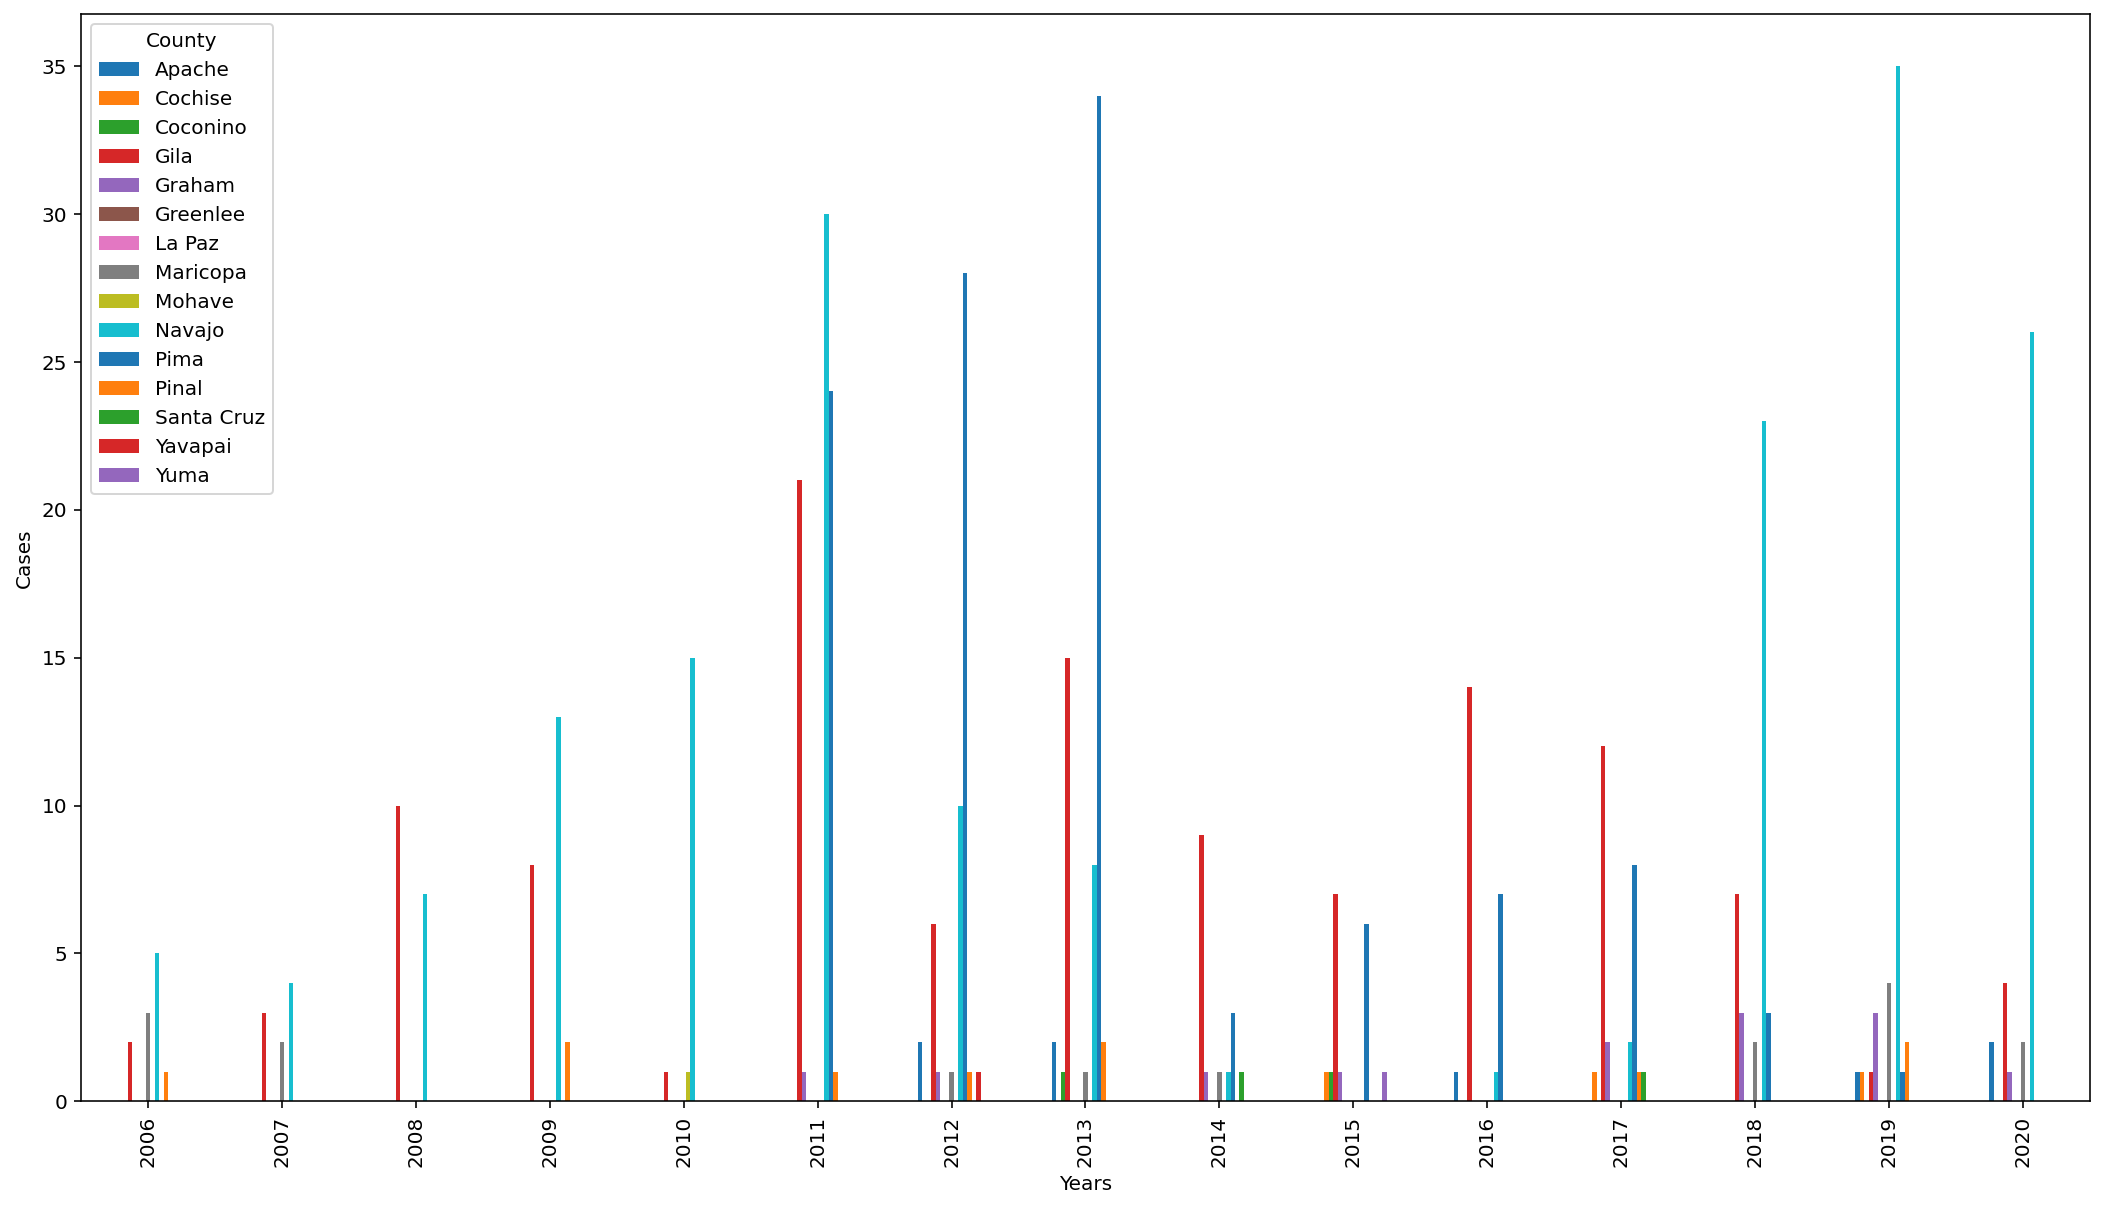

In [77]:
# Pivot the DF so that there's a column for each month, each row\
# represents a year, and the cells have the mean page views for the\
# respective year and month
df_pivot = pd.pivot_table(
	df,
	values="Cases",
	index="Year",
	columns="County",
	aggfunc=np.mean
)

# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(18, 10)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Cases")

In [7]:
sorted_df=df.sort_values(by='Cases', ascending=False)

In [8]:
sorted_df.style.background_gradient(cmap='Reds')

,County,Year,LST,Precipitation,NDVI,RH,avg_temp,max_temp,min_temp,Cases
208,Navajo,2019,30.959098,0.617459,0.220700,72.562933,12.888455,25.022000,-1.820000,35
105,Pima,2013,36.912767,0.781198,0.206928,65.452523,21.077562,34.569000,9.932000,34
88,Navajo,2011,30.033422,0.628843,0.206276,71.828716,12.571975,25.783000,-1.301000,30
90,Pima,2012,36.941720,0.702514,0.202034,61.096811,21.046665,34.895000,10.647000,28
223,Navajo,2020,30.993715,0.570103,0.226935,72.176496,13.579075,24.617000,-3.060000,26
75,Pima,2011,37.284808,0.685732,0.194383,57.439923,21.065253,34.622000,8.871000,24
193,Navajo,2018,30.484885,0.751489,0.213158,73.111259,12.795918,26.040000,0.434000,23
77,Gila,2011,29.257062,1.043854,0.360035,59.512821,15.701505,28.775000,1.219000,21
107,Gila,2013,28.169119,1.249994,0.370107,66.218895,15.667387,28.351000,2.521000,15
73,Navajo,2010,29.008711,0.721590,0.204486,77.273595,11.727419,25.248000,-0.909000,15


In [9]:
import plotly as py
import plotly.graph_objects as go
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)    #THIS LINE IS MOST IMPORTANT AS THIS WILL DISPLAY PLOT ON 
#NOTEBOOK WHILE KERNEL IS RUNNING

#Time Series plot for knwoing the spread

fig = go.Figure()
fig.add_trace(go.Scatter(
                x=df.Year,
                y=df['Cases'],
                name="Cases",
                line_color='deepskyblue',
                opacity=0.8))

fig.update_layout(title_text='Time Series with Rangeslider',
                  xaxis_rangeslider_visible=True)
py.offline.iplot(fig)

In [10]:
df=df.drop('Year',axis=1)

In [11]:
df

,County,LST,Precipitation,NDVI,RH,avg_temp,max_temp,min_temp,Cases
0,Pima,36.623543,0.791023,0.199175,61.663095,20.829992,33.340,10.127,0
1,Santa Cruz,31.509315,1.223425,0.302374,69.567057,17.075364,29.943,6.448,0
2,Gila,28.313258,1.235358,0.355017,61.666447,15.491440,27.803,2.646,2
3,Yuma,39.891330,0.175424,0.144477,57.504886,23.649551,35.569,12.451,0
4,Cochise,32.670637,0.960475,0.247526,68.140400,17.014240,29.133,5.549,0
...,...,...,...,...,...,...,...,...,...
220,Graham,32.414231,0.796000,0.290644,67.227296,17.754924,28.186,2.182,1
221,Pinal,36.477662,0.685729,0.247965,59.952446,22.094274,32.706,7.448,0
222,Maricopa,37.775552,0.568762,0.216310,57.777460,23.158180,32.599,7.955,2
223,Navajo,30.993715,0.570103,0.226935,72.176496,13.579075,24.617,-3.060,26


In [12]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)

,LST,Precipitation,NDVI,RH,avg_temp,max_temp,min_temp,Cases
LST,1.000000,-0.695494,-0.703336,-0.647681,0.964086,0.952435,0.932027,-0.095571
Precipitation,-0.695494,1.000000,0.900637,0.493997,-0.546963,-0.530161,-0.479385,0.031752
NDVI,-0.703336,0.900637,1.000000,0.390309,-0.534811,-0.573098,-0.545216,0.068822
RH,-0.647681,0.493997,0.390309,1.000000,-0.689333,-0.655285,-0.635176,0.079724
avg_temp,0.964086,-0.546963,-0.534811,-0.689333,1.000000,0.969050,0.962425,-0.128973
max_temp,0.952435,-0.530161,-0.573098,-0.655285,0.969050,1.000000,0.984334,-0.110050
min_temp,0.932027,-0.479385,-0.545216,-0.635176,0.962425,0.984334,1.000000,-0.142263
Cases,-0.095571,0.031752,0.068822,0.079724,-0.128973,-0.110050,-0.142263,1.000000


/Users/hridoy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

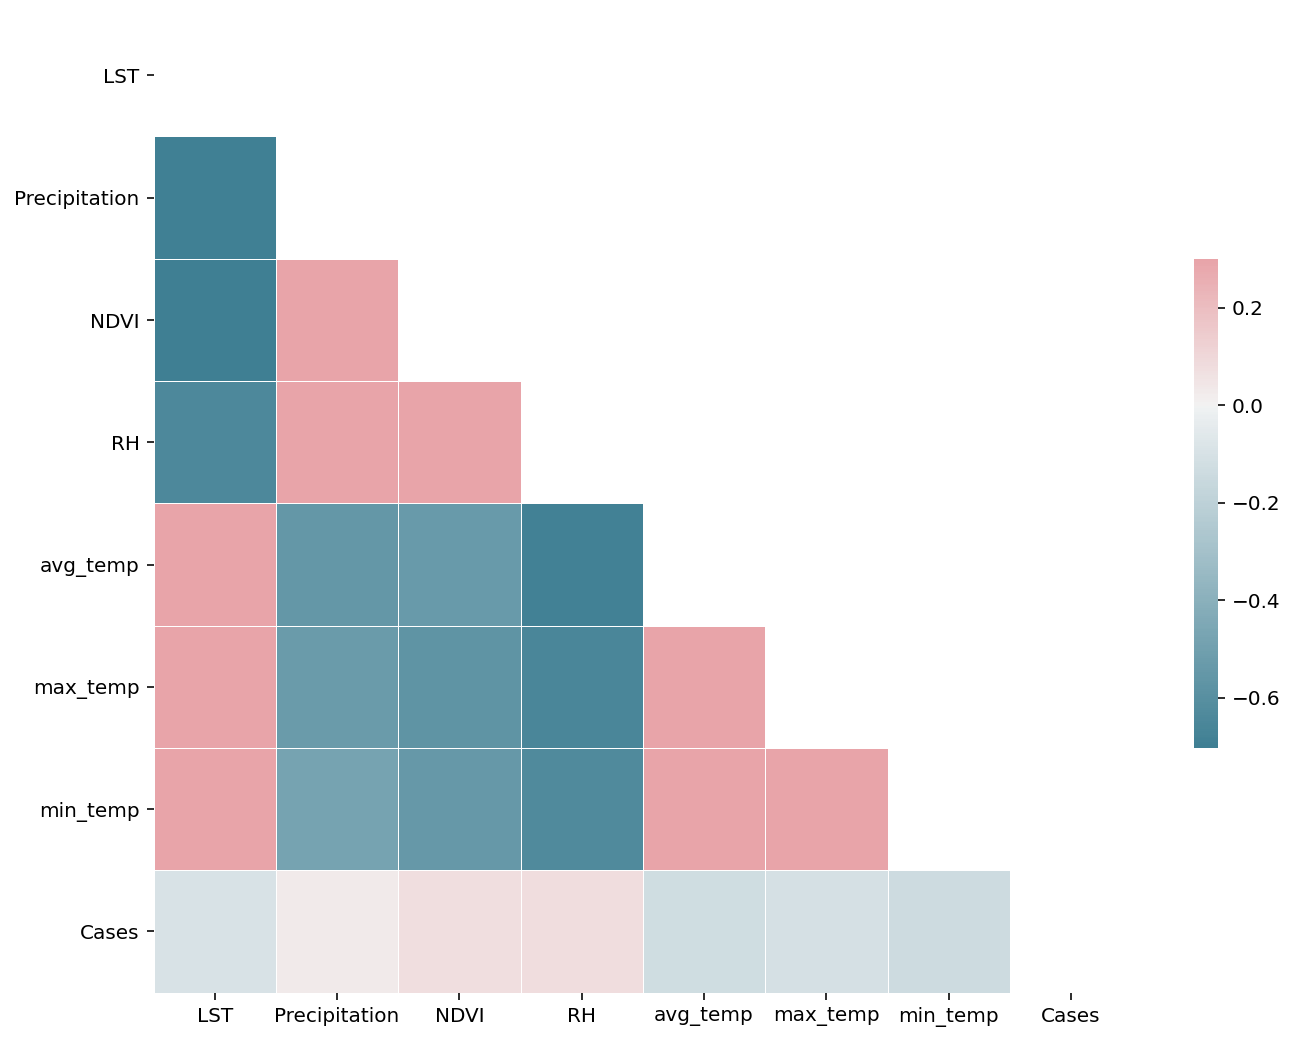

In [13]:

#correlation matrix
corr_matrix = df.corr()

#generate mask for upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#set up matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

#generate diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#draw heatmap with mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

In [15]:
def jointplots(xs, y, data, hue=None, height=6, ratio=5, space=0.2, xlabels=None, ylabel=None, margin_norm=False):
    """
    -------------------
    Input Parameters
    -------------------
    xs      : (list or str) feature name(s) of data
    y       : (str) feature name of data
    data    : (pandas.DataFrame)
    hue     : (str) semantic variable that is mapped to determine the color of plot elements. Semantic variable that is mapped to determine the color of plot elements.
    
    height  : (float) size of the figure
    ratio   : (float) ratio of the joint axes height to marginal axes height.
    space   : (float) space between the joint and marginal axes
    
    xlabels : (list or str) xlabels
    ylabel  : (str) ylabel
    margin_norm : (boolean) if True, kdeplots at marginal axes have same scale.
    """
    ### 1. input check
    # input type
    assert isinstance(xs, list) or isinstance(xs, str)
    if isinstance(xs, list):
        assert all([isinstance(x, str) for x in xs])
    else:
        xs = [xs]
        
    
    if xlabels != None:
        assert isinstance(xlabels, list) or isinstance(xlabels, str)
        if isinstance(xlabels, list):
            assert all([isinstance(xlabel, str) for xlabel in xlabels])
        else:
            xlabels = [xlabels]
    
    if ylabel != None:
        assert isinstance(ylabel, str)
    
    if hue != None:
        assert isinstance(hue, str)
    
    # input data
    assert all([x in data.columns for x in xs])
    assert y in data.columns
    if hue != None:
        assert hue in data.columns
    
    
    ### 2. figure
    h_margin = height / (ratio + 1)
    h_joint = height - h_margin
    
    if isinstance(xs, list):
        n_x = len(xs)
    else:
        n_x = 1
    
    widths = [h_joint] * n_x + [h_margin]
    heights = [h_margin, h_joint]
    ncols = len(widths)
    nrows = len(heights)
    
    fig = plt.figure(figsize=(sum(widths), sum(heights)))
    
    ### 3. gridspec preparation
    spec = fig.add_gridspec(ncols=ncols, nrows=nrows, 
                            width_ratios = widths, height_ratios = heights,
                            wspace=space, hspace=space
                           )
    
    ### 4. setting axes
    axs = {}
    for i in range(ncols * nrows):
        axs[i] = fig.add_subplot(spec[i//ncols, i%ncols])
    
    
    ### 5. jointplots (scatterplot + kdeplot)
    for i, x in enumerate(xs, ncols):
        if i == ncols:
            legend=True
        else:
            legend=False
        sns.kdeplot(x=x, y=y, data=data, hue=hue, alpha=0.3, ax=axs[i], zorder=2, legend=False)
        sns.scatterplot(x=x, y=y, data=data, hue=hue, alpha=0.8, ax=axs[i], zorder=3, legend=legend)
    
    
    ### 6. kdeplots at marginal axes
    axs[ncols-1].axis("off")
    
    axes_mx = list(range(ncols-1))
    axes_my = 2*ncols - 1
    
    for i, x in zip(axes_mx, xs):
        sns.kdeplot(x=x, data=data, hue=hue, fill=True, ax=axs[i], zorder=2, legend=False)
        axs[i].set_xlim(axs[i+ncols].get_xlim())
        axs[i].set_xlabel("")
        axs[i].set_xticklabels([])
        axs[i].spines["left"].set_visible(False)
        axs[i].spines["top"].set_visible(False)
        axs[i].spines["right"].set_visible(False)
    
    sns.kdeplot(y=y, data=data, hue=hue, fill=True, ax=axs[axes_my], zorder=2, legend=False)
    axs[axes_my].set_ylim(axs[ncols].get_ylim())
    axs[axes_my].set_ylabel("")
    axs[axes_my].set_yticklabels([])
    axs[axes_my].spines["bottom"].set_visible(False)
    axs[axes_my].spines["top"].set_visible(False)
    axs[axes_my].spines["right"].set_visible(False)
    
    if margin_norm == True:
        hist_range_max = max([axs[m].get_ylim()[-1] for m in axes_mx] + [axs[axes_my].get_xlim()[-1]])
        for i in axes_mx:
            axs[i].set_ylim(0, hist_range_max)
        axs[axes_my].set_xlim(0, hist_range_max)
        
        
    ### 7. unnecessary elements removal
    # 7.1. labels and ticklabels
    axes_j = list(range(ncols, 2*ncols-1))
    for i in axes_j:
        if i != ncols:
            axs[i].set_ylabel("")
            axs[i].set_yticklabels([])
    
    # 7.2. marginal axes
    for i in axes_mx:
        if i != 0:
            axs[i].set_ylabel("")
        
        axs[i].grid("on", color="lightgray", zorder=0)
        axs[i].set_yticklabels([])
        
        yticks = axs[i].get_yticks()
        ylim = axs[i].get_ylim()
        for ytick in yticks:
            if 0 < ytick < ylim[-1]:
                axs[i].text(axs[i].get_xlim()[0], ytick, str(ytick), 
                            fontdict={"verticalalignment":"center"})
        
    axs[axes_my].grid("on", color="lightgray", zorder=0)
    axs[axes_my].set_xticklabels([])
    axes_my_xticks = axs[axes_my].get_xticks()
    axes_my_xlim = axs[axes_my].get_xlim()
    for xtick in axes_my_xticks:
        if 0 < xtick < axes_my_xlim[-1]:
            axs[axes_my].text(xtick, axs[axes_my].get_ylim()[0], str(xtick), 
                              rotation=270, fontdict={"horizontalalignment":"center"})
    
    # 7.3. labels
    font_label = {"color": "gray", "fontsize":"large"}
    labelpad = 12
    for i, x in zip(axes_j, xlabels):
        axs[i].set_xlabel(x, fontdict=font_label, labelpad=labelpad)
        if i == ncols:
            axs[i].set_ylabel(ylabel, fontdict=font_label, labelpad=labelpad)
    
    axs[0].set_ylabel("Density", fontdict=font_label, labelpad=labelpad)
    axs[2*ncols-1].set_xlabel("Density", fontdict=font_label, labelpad=labelpad)
    
    fig.align_ylabels([axs[0], axs[ncols]])
    fig.align_xlabels([axs[x] for x in range(ncols, 2*ncols)])
    plt.tight_layout()
    
    return fig, axs

In [16]:
df.columns

Index(['County', 'LST', 'Precipitation', 'NDVI', 'RH', 'avg_temp', 'max_temp',
       'min_temp', 'Cases'],
      dtype='object')

/Users/hridoy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:161: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



(<Figure size 3600x720 with 16 Axes>,
 {0: <AxesSubplot:ylabel='Density'>,
  1: <AxesSubplot:>,
  2: <AxesSubplot:>,
  3: <AxesSubplot:>,
  4: <AxesSubplot:>,
  5: <AxesSubplot:>,
  6: <AxesSubplot:>,
  7: <AxesSubplot:>,
  8: <AxesSubplot:xlabel='LST', ylabel='Cases'>,
  9: <AxesSubplot:xlabel='Precipitation'>,
  10: <AxesSubplot:xlabel='NDVI'>,
  11: <AxesSubplot:xlabel='RH'>,
  12: <AxesSubplot:xlabel='avg_temp'>,
  13: <AxesSubplot:xlabel='max_temp'>,
  14: <AxesSubplot:xlabel='min_temp'>,
  15: <AxesSubplot:xlabel='Density'>})

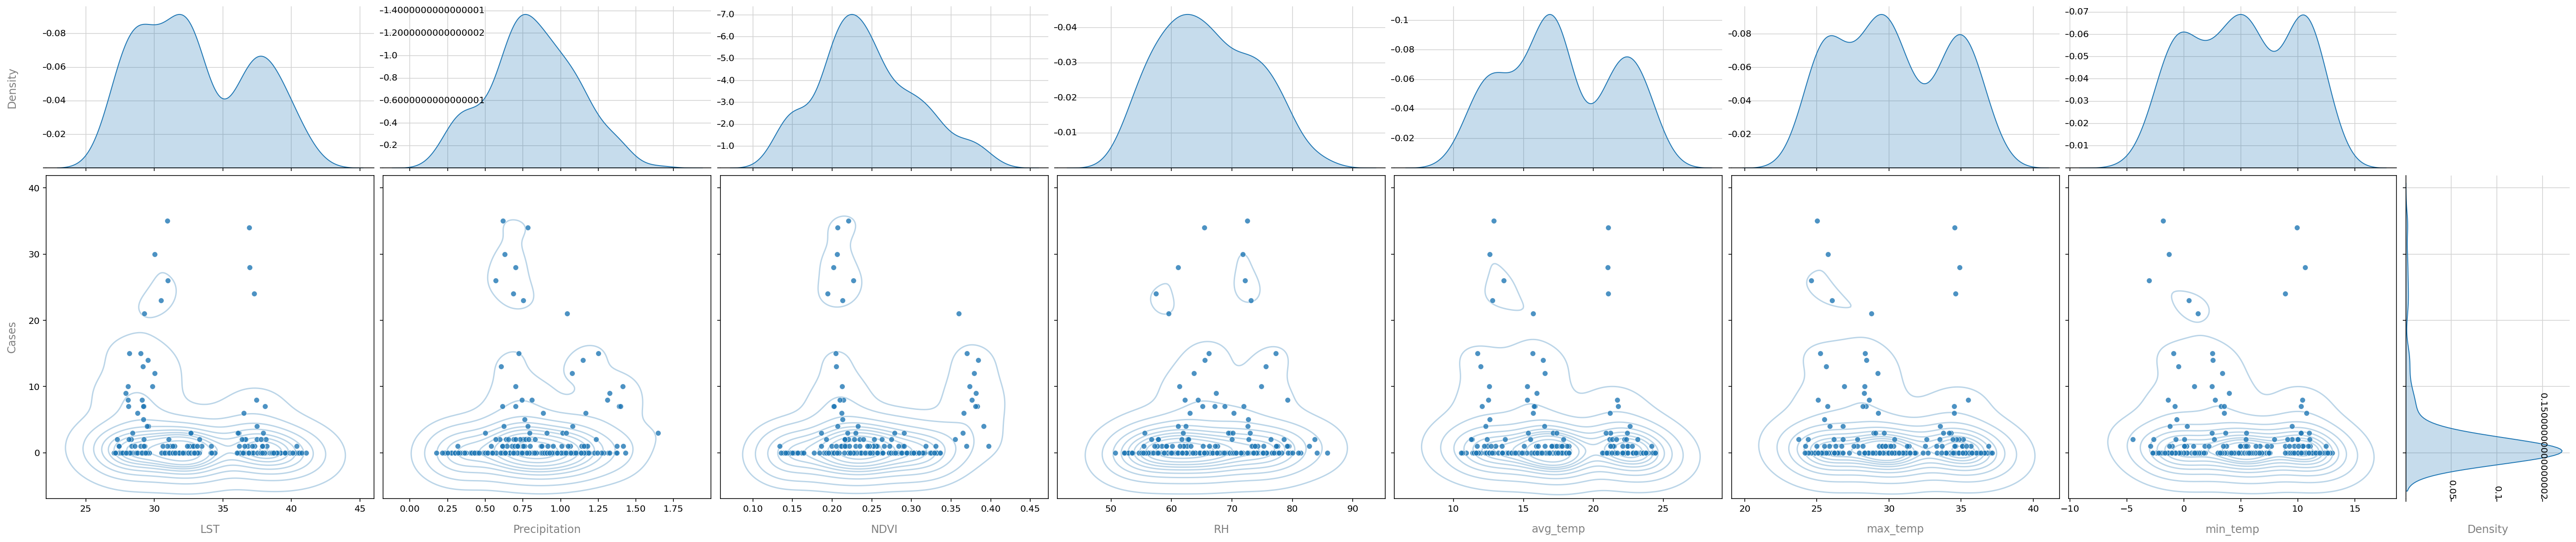

In [17]:

jointplots(['LST', 'Precipitation', 'NDVI', 'RH', 'avg_temp', 'max_temp',
       'min_temp'], 'Cases', df, hue=None, 
            height=10, ratio=2, space=0.03, 
            xlabels=['LST', 'Precipitation', 'NDVI', 'RH', 'avg_temp', 'max_temp',
       'min_temp'], ylabel="Cases")


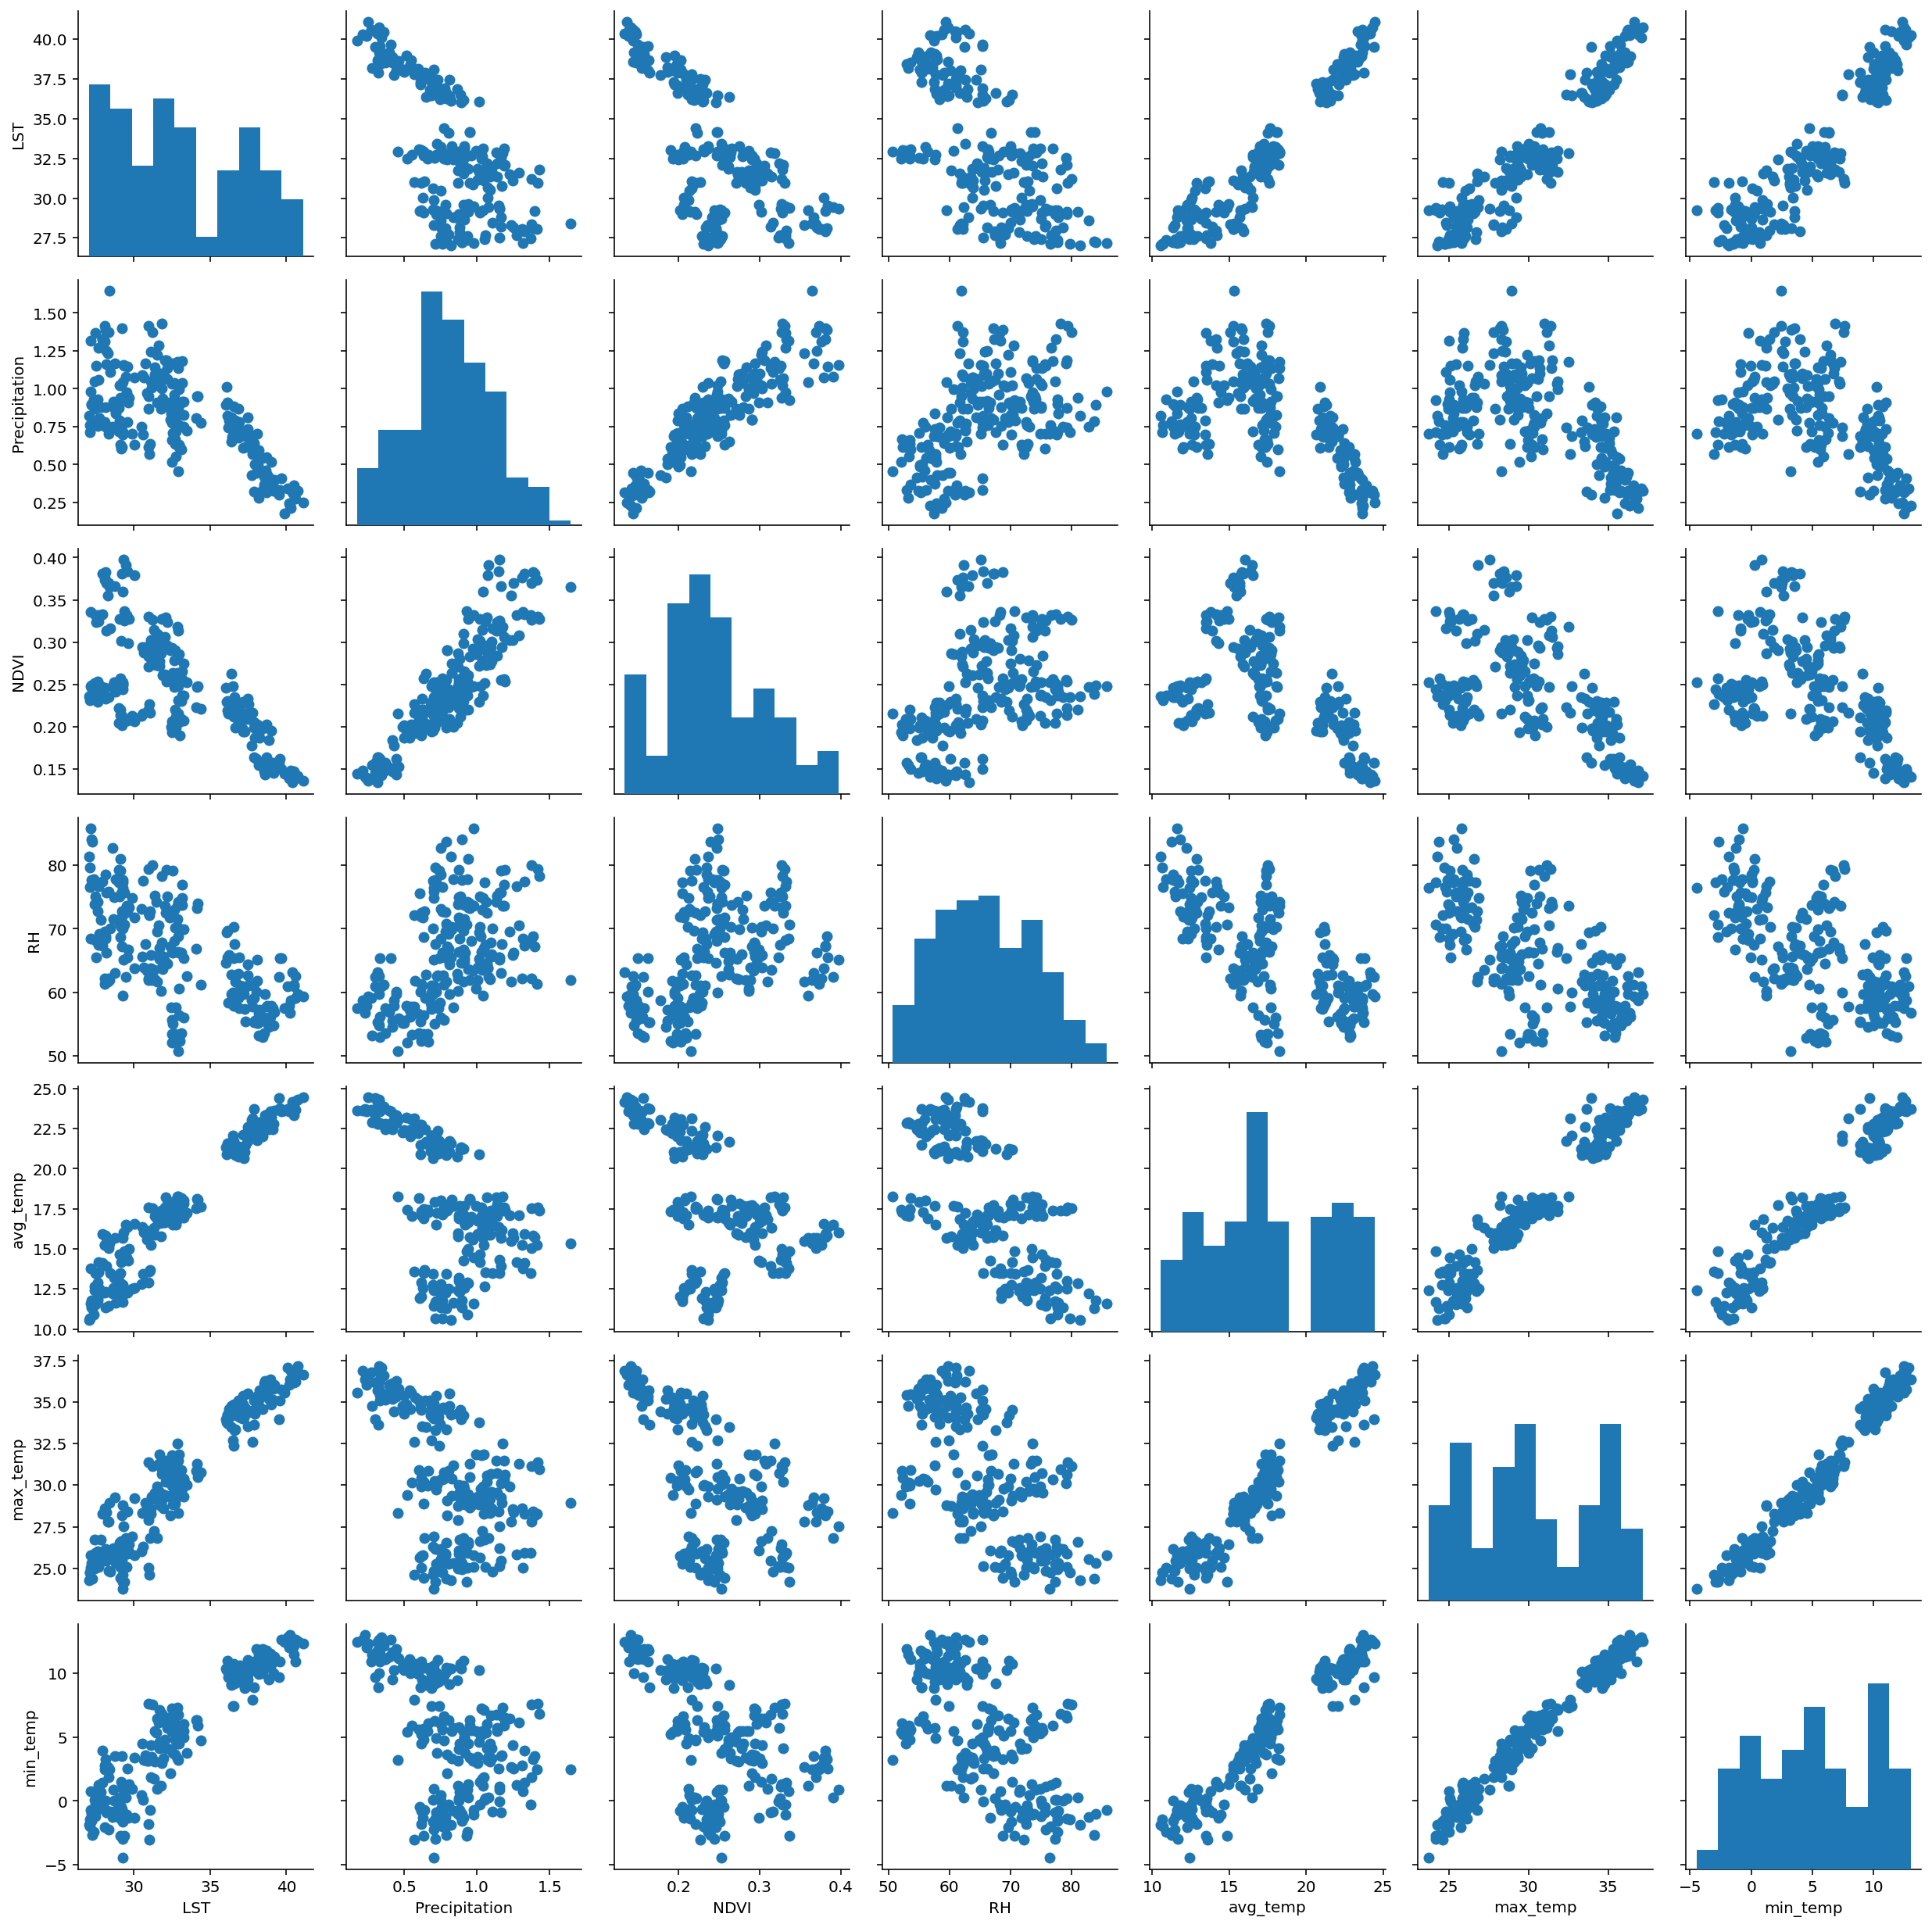

In [18]:
g = sns.PairGrid(df, 
                  vars=['LST', 'Precipitation', 'NDVI', 'RH', 'avg_temp', 'max_temp',
       'min_temp'])
g2 = g.map_diag(plt.hist)
g3 = g2.map_offdiag(plt.scatter)
plt.show()

In [19]:
data1 = df[['LST', 'Precipitation', 'NDVI', 'RH', 'avg_temp', 'max_temp',
       'min_temp']]
data1.head()

,LST,Precipitation,NDVI,RH,avg_temp,max_temp,min_temp
0,36.623543,0.791023,0.199175,61.663095,20.829992,33.340,10.127
1,31.509315,1.223425,0.302374,69.567057,17.075364,29.943,6.448
2,28.313258,1.235358,0.355017,61.666447,15.491440,27.803,2.646
3,39.891330,0.175424,0.144477,57.504886,23.649551,35.569,12.451
4,32.670637,0.960475,0.247526,68.140400,17.014240,29.133,5.549


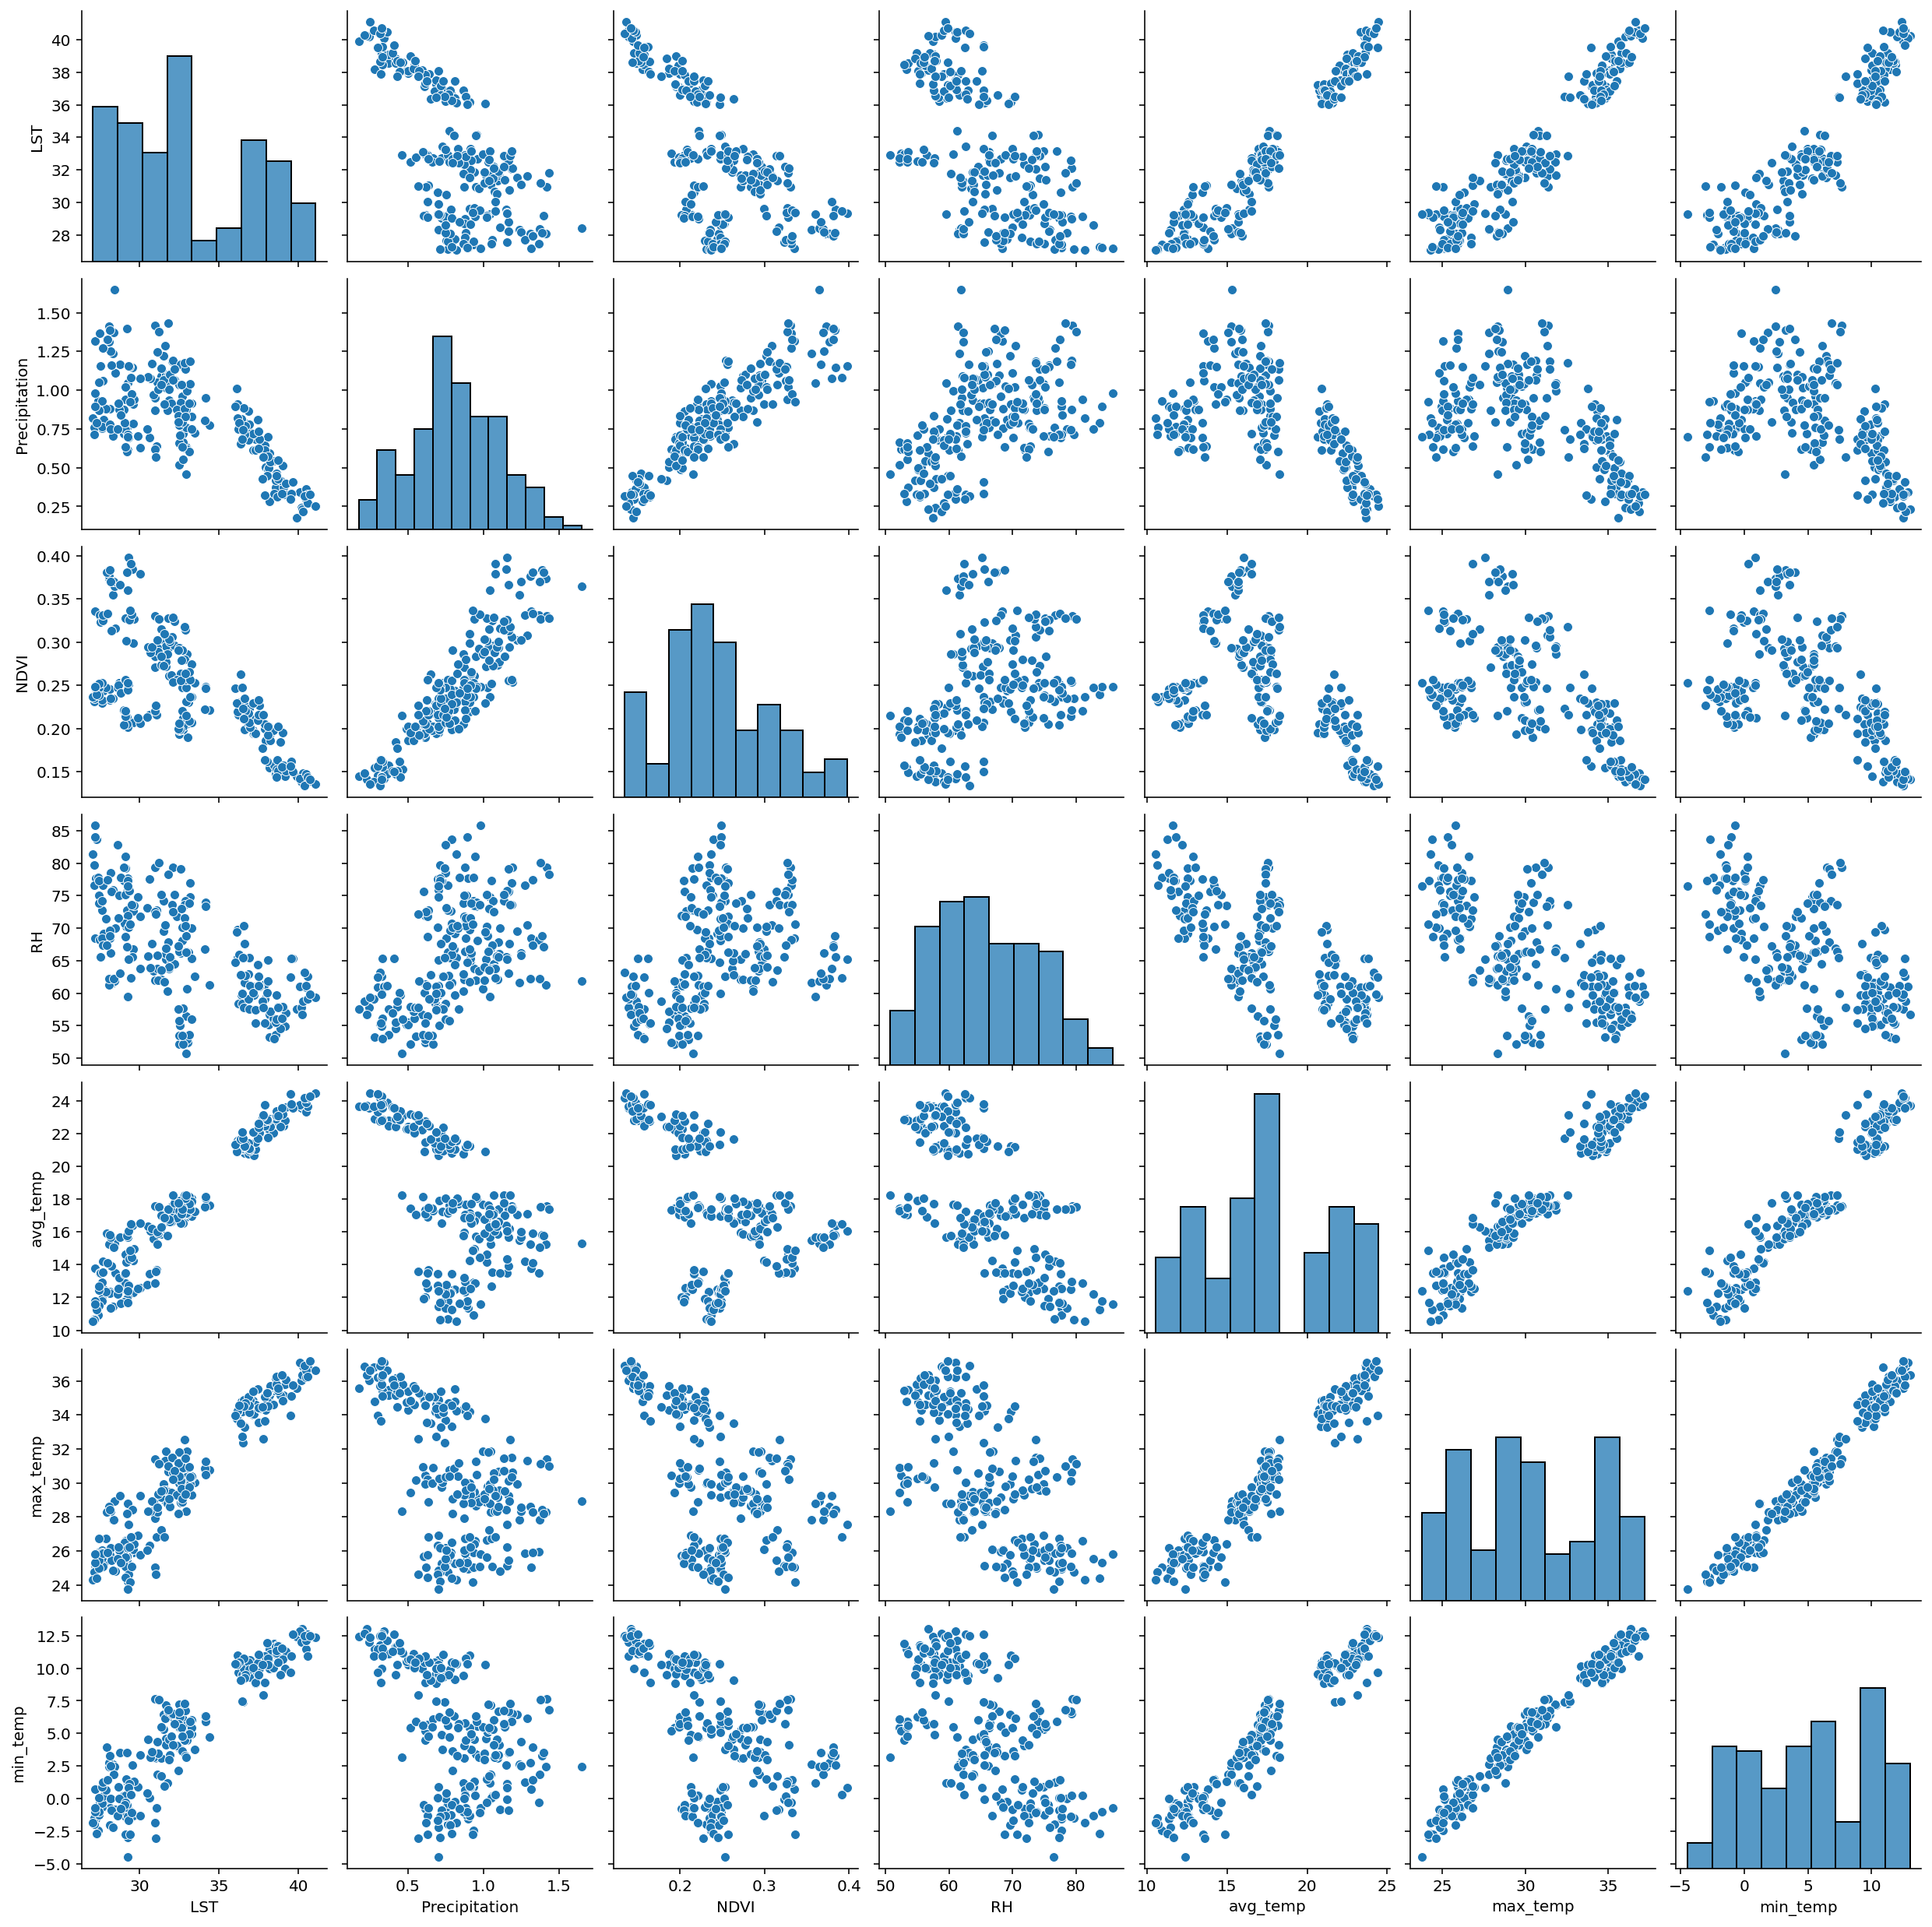

In [20]:
sns.pairplot(data1,)
plt.show()

In [21]:
from patsy import dmatrices

import statsmodels.api as sm
import statsmodels.formula.api as smf


In [22]:
df.columns

Index(['County', 'LST', 'Precipitation', 'NDVI', 'RH', 'avg_temp', 'max_temp',
       'min_temp', 'Cases'],
      dtype='object')

In [23]:
expr = """Cases ~  LST  + Precipitation + NDVI + RH + avg_temp + max_temp +min_temp """

In [24]:
X= data1

In [25]:
y= df['Cases']

In [26]:
X

,LST,Precipitation,NDVI,RH,avg_temp,max_temp,min_temp
0,36.623543,0.791023,0.199175,61.663095,20.829992,33.340,10.127
1,31.509315,1.223425,0.302374,69.567057,17.075364,29.943,6.448
2,28.313258,1.235358,0.355017,61.666447,15.491440,27.803,2.646
3,39.891330,0.175424,0.144477,57.504886,23.649551,35.569,12.451
4,32.670637,0.960475,0.247526,68.140400,17.014240,29.133,5.549
...,...,...,...,...,...,...,...
220,32.414231,0.796000,0.290644,67.227296,17.754924,28.186,2.182
221,36.477662,0.685729,0.247965,59.952446,22.094274,32.706,7.448
222,37.775552,0.568762,0.216310,57.777460,23.158180,32.599,7.955
223,30.993715,0.570103,0.226935,72.176496,13.579075,24.617,-3.060


In [65]:
#Using the statsmodels GLM class, train the Poisson regression model on the training data set
poisson_training_results = sm.GLM(y, X, family=sm.families.Binomial()).fit()

/Users/hridoy/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning:

divide by zero encountered in true_divide

/Users/hridoy/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning:

invalid value encountered in true_divide

/Users/hridoy/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning:

overflow encountered in exp

/Users/hridoy/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning:

divide by zero encountered in true_divide

/Users/hridoy/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning:

invalid value encountered in true_divide



In [28]:
#print out the training summary
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Cases   No. Observations:                  225
Model:                            GLM   Df Residuals:                      218
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Nov 2022   Deviance:                          nan
Time:                        01:36:40   Pearson chi2:                 3.37e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
LST            1.968e+17   7.49e+06   2.63e+10

/Users/hridoy/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:946: RuntimeWarning:

divide by zero encountered in true_divide

/Users/hridoy/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:946: RuntimeWarning:

divide by zero encountered in log

/Users/hridoy/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:946: RuntimeWarning:

invalid value encountered in multiply

/Users/hridoy/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:946: RuntimeWarning:

invalid value encountered in add

/Users/hridoy/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:947: RuntimeWarning:

divide by zero encountered in log

/Users/hridoy/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:947: RuntimeWarning:

invalid value encountered in add



In [29]:
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]

In [30]:
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=170
Testing data set length=55


In [31]:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')


In [67]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial()).fit()

# Gneeralized Linear Model NegativeBinomial 

In [68]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Cases   No. Observations:                  170
Model:                            GLM   Df Residuals:                      162
Model Family:        NegativeBinomial   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -290.73
Date:                Mon, 07 Nov 2022   Deviance:                       311.02
Time:                        01:49:57   Pearson chi2:                     511.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -59.5849      6.993     -8.520

In [34]:
spector_data = sm.datasets.spector.load()

In [35]:
spector_data

<class 'statsmodels.datasets.utils.Dataset'>

In [40]:
spector_data.exog

array([[ 2.66, 20.  ,  0.  ,  1.  ],
       [ 2.89, 22.  ,  0.  ,  1.  ],
       [ 3.28, 24.  ,  0.  ,  1.  ],
       [ 2.92, 12.  ,  0.  ,  1.  ],
       [ 4.  , 21.  ,  0.  ,  1.  ],
       [ 2.86, 17.  ,  0.  ,  1.  ],
       [ 2.76, 17.  ,  0.  ,  1.  ],
       [ 2.87, 21.  ,  0.  ,  1.  ],
       [ 3.03, 25.  ,  0.  ,  1.  ],
       [ 3.92, 29.  ,  0.  ,  1.  ],
       [ 2.63, 20.  ,  0.  ,  1.  ],
       [ 3.32, 23.  ,  0.  ,  1.  ],
       [ 3.57, 23.  ,  0.  ,  1.  ],
       [ 3.26, 25.  ,  0.  ,  1.  ],
       [ 3.53, 26.  ,  0.  ,  1.  ],
       [ 2.74, 19.  ,  0.  ,  1.  ],
       [ 2.75, 25.  ,  0.  ,  1.  ],
       [ 2.83, 19.  ,  0.  ,  1.  ],
       [ 3.12, 23.  ,  1.  ,  1.  ],
       [ 3.16, 25.  ,  1.  ,  1.  ],
       [ 2.06, 22.  ,  1.  ,  1.  ],
       [ 3.62, 28.  ,  1.  ,  1.  ],
       [ 2.89, 14.  ,  1.  ,  1.  ],
       [ 3.51, 26.  ,  1.  ,  1.  ],
       [ 3.54, 24.  ,  1.  ,  1.  ],
       [ 2.83, 27.  ,  1.  ,  1.  ],
       [ 3.39, 17.  ,  1.  ,  1.  ],
 

In [45]:
X=np.array(data1)

In [47]:
y=np.array(y)

In [52]:
 spector_data.exog = sm.add_constant(data1, prepend=False)

/Users/hridoy/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [53]:
 mod = sm.OLS(df['Cases'], spector_data.exog)

In [54]:
res = mod.fit()

# Multiple OLS regression

In [55]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Cases   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     2.574
Date:                Mon, 07 Nov 2022   Prob (F-statistic):             0.0144
Time:                        01:42:52   Log-Likelihood:                -700.26
No. Observations:                 225   AIC:                             1417.
Df Residuals:                     217   BIC:                             1444.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
LST               1.5050      0.690      2.181

In [62]:
 mod_neg_b = sm.GLM(df['Cases'], spector_data.exog,family=sm.families.NegativeBinomial())

In [63]:
res_neg_b =  mod_neg_b.fit()

In [64]:
res_neg_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Cases   No. Observations:                  225
Model:                            GLM   Df Residuals:                      217
Model Family:        NegativeBinomial   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -394.82
Date:                Mon, 07 Nov 2022   Deviance:                       435.93
Time:                        01:47:11   Pearson chi2:                     764.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
LST               1.1242      0.171      6.587      0.000       0.790       1.459
Precipitation    -0.0329      0.933     -0.035      0.972      -1.862       1.796
NDVI             24.6439      4.883      5.047      0.000      15.074      34.214
RH                0.0272      0.018      1.521      0.128      -0.008       0.062
avg_temp         -1.3247      0.195     -6.804      0.000      -1.706      -0.943
max_temp          0.9507      0.163      5.827      0.000       0.631       1.270
min_temp         -0.5073      0.132     -3.836      0.000      -0.766      -0.248
const           -47.3601      5.321     -8.901      0.000     -57.789     -36.932
=================================================================================
"""